# 1. Imports

In [13]:
# Add the project root to Python path
sys.path.append(os.path.abspath('..'))
print(sys.path)
import sys
import os
import pandas as pd
from dotenv import load_dotenv
from diabetes_ensemble import config

df: pd.DataFrame = pd.read_csv(config.RAW_DATA_DIR / 'diabetes.csv')
df.head()

['/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Users/jared.thach/j/diabetes-ensemble/venv/lib/python3.10/site-packages', '/Users/jared.thach/j/diabetes-ensemble', '/Users/jared.thach/j/diabetes-ensemble', '/Users/jared.thach/j/diabetes-ensemble', '/Users/jared.thach/j/diabetes-ensemble']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. Exploratory Data Analysis (EDA)

In [70]:
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt

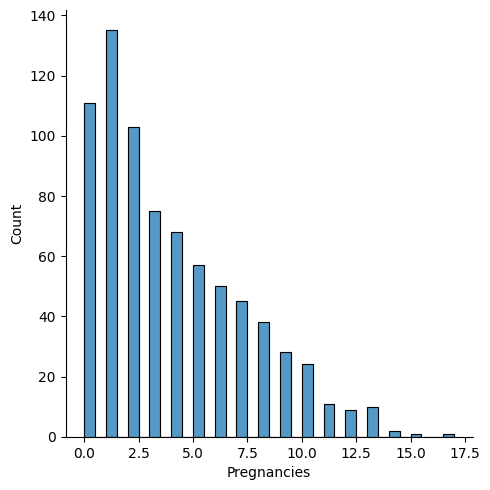

In [41]:
# Histogram of 'Pregnancies'
sns.displot(data=df, x='Pregnancies', binwidth=0.5, )


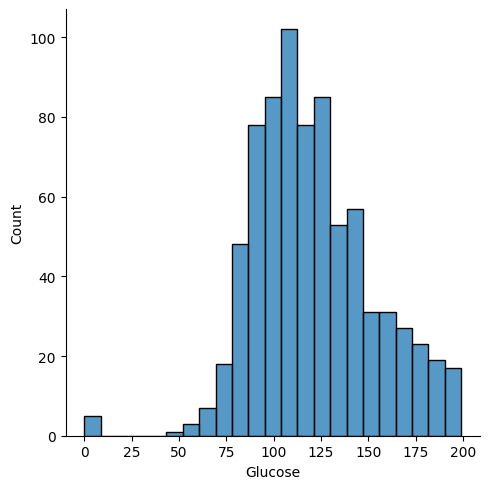

In [32]:
# Histogram of 'Glucose'
sns.displot(data=df, x='Glucose')

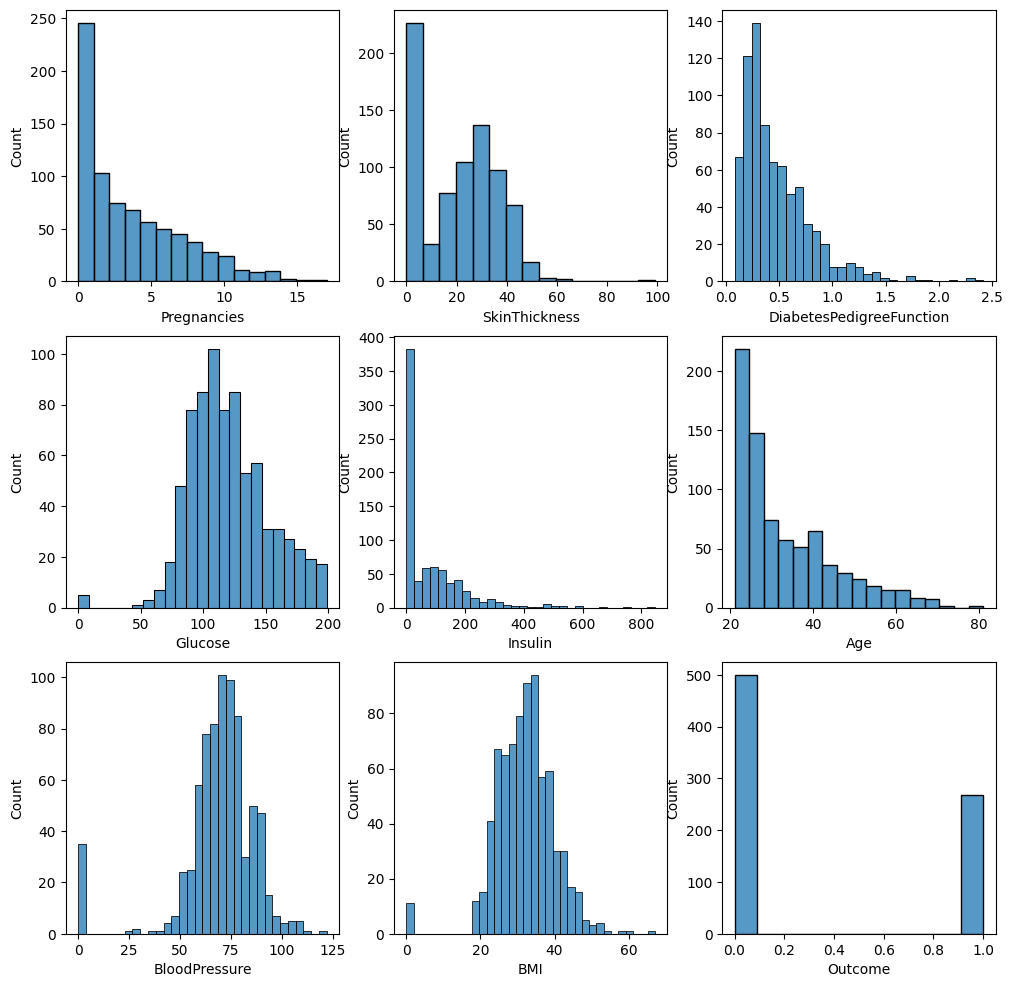

In [110]:
def generate_figure(data: pd.DataFrame, x_dim, y_dim, figsize=(4,4)):
    fig, axes = plt.subplots(y_dim, x_dim, figsize=figsize)

    r, c = 0, 0
    for col in data.columns:
        sns.histplot(data=df, x=col, ax=axes[r,c])
        r += 1
        if r > y_dim - 1:
            r = 0
            c += 1

    return fig, axes

fig, axes = generate_figure(data=df, x_dim=3, y_dim=3, figsize=(12,12));